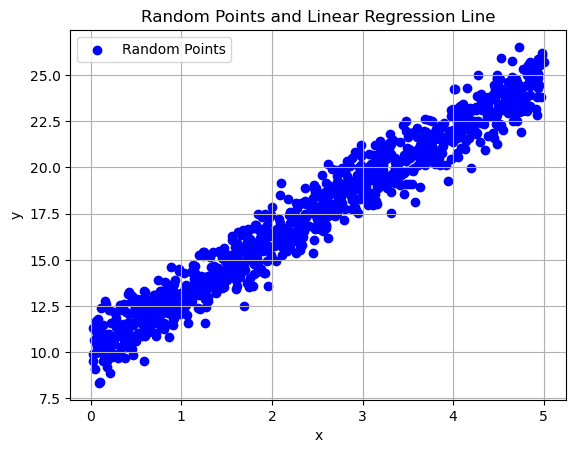

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the linear equation
m = 3.0  # slope
b = 10.0  # y-intercept

# Generate random x values
np.random.seed(42)  # For reproducibility
x =  5*np.random.rand(1000, 1)  # Random values between 0 and 2

# Generate corresponding y values with some noise
y = m * x + b + np.random.randn(1000, 1) * 0.9  # Adding noise
x_normal = []
x_min = np.min(x)
x_max = np.max(x)



# Plotting the results
plt.scatter(x, y, color='blue', label='Random Points')
plt.title('Random Points and Linear Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


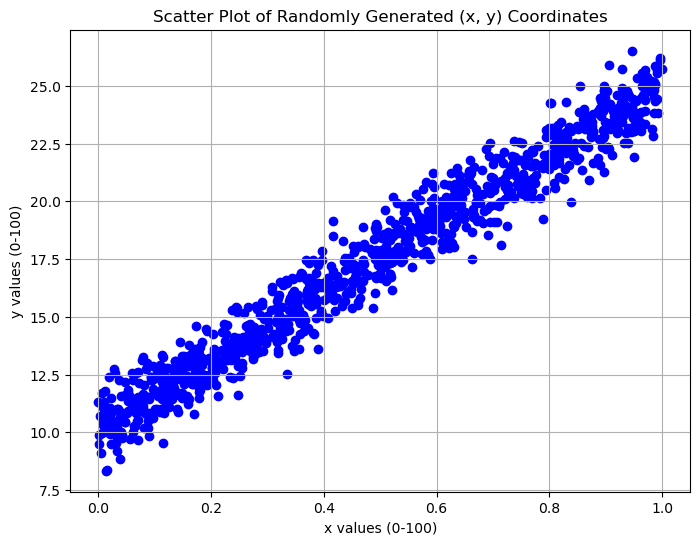

In [4]:
x_normal = (x - x_min) / (x_max - x_min)


plt.figure(figsize=(8, 6))
plt.scatter(x_normal, y, color='blue')

plt.title("Scatter Plot of Randomly Generated (x, y) Coordinates")
plt.xlabel("x values (0-100)")
plt.ylabel("y values (0-100)")
plt.grid(True)

# Відображаємо графік
plt.show()

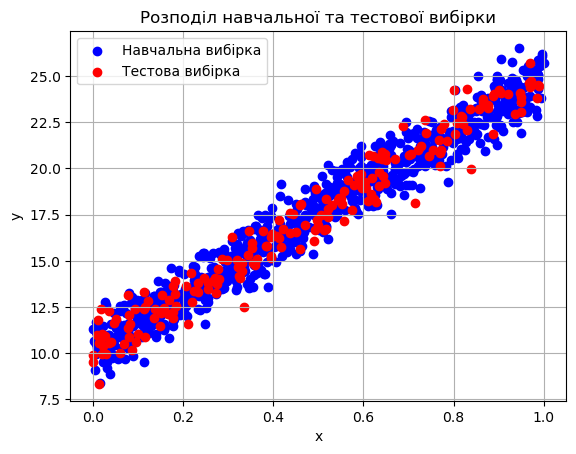

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_normal, y, test_size=0.2, random_state=42)

# Візуалізація навчальної вибірки
plt.scatter(x_train, y_train, color='blue', label='Навчальна вибірка')
plt.scatter(x_test, y_test, color='red', label='Тестова вибірка')
plt.title('Розподіл навчальної та тестової вибірки')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

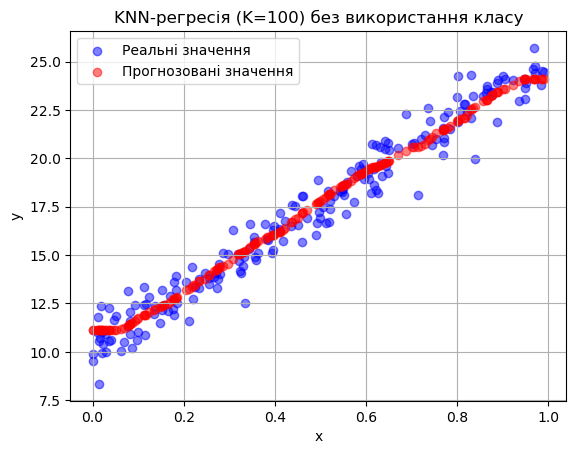

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, x_train) for x_train in X_train]
        
        k_indices = np.argsort(distances)[:k]
        
        k_nearest_labels = [y_train[i] for i in k_indices]
        avg_label = np.mean(k_nearest_labels)
        
        predictions.append(avg_label)
    return np.array(predictions)

k = 100

y_pred = knn_predict(x_train, y_train, x_test, k)

plt.scatter(x_test, y_test, color='blue', label='Реальні значення', alpha=0.5)
plt.scatter(x_test, y_pred, color='red', label='Прогнозовані значення', alpha=0.5)
plt.title(f'KNN-регресія (K={k}) без використання класу')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функція обчислення евклідової відстані між двома точками
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Функція KNN-регресії
def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, x_train) for x_train in X_train]
        
        # Знаходження k найближчих сусідів
        k_indices = np.argsort(distances)[:k]
        
        # Отримання відповідних міток для k найближчих сусідів
        k_nearest_labels = [y_train[i] for i in k_indices]
        avg_label = np.mean(k_nearest_labels)
        
        predictions.append(avg_label)
    return np.array(predictions)

# Функція обчислення середньоквадратичної похибки
def mse(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

# Ініціалізація діапазону значень для параметра k
k_values = range(1, 801, 50)
mse_values = []

# Перебір значень k та обчислення MSE для кожного з них
for k in k_values:
    y_pred = knn_predict(x_train, y_train, x_test, k)
    error = mse(y_test, y_pred)
    mse_values.append(error)

# Знаходження оптимального значення k з мінімальною MSE
optimal_k = k_values[np.argmin(mse_values)]

# Побудова графіку MSE залежно від k
plt.plot(k_values, mse_values, label='MSE значення')
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Оптимальне k={optimal_k}')
plt.title('Залежність MSE від кількості сусідів k')
plt.xlabel('Кількість сусідів k')
plt.ylabel('Середньоквадратична похибка (MSE)')
plt.legend()
plt.grid()
plt.show()

print(f"Оптимальне значення k: {optimal_k}")


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Функція обчислення евклідової відстані між двома точками
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Функція KNN-регресії
def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, x_train) for x_train in X_train]
        
        # Знаходження k найближчих сусідів
        k_indices = np.argsort(distances)[:k]
        
        # Отримання відповідних міток для k найближчих сусідів
        k_nearest_labels = [y_train[i] for i in k_indices]
        avg_label = np.mean(k_nearest_labels)
        
        predictions.append(avg_label)
    return np.array(predictions)

# Функція обчислення середньоквадратичної похибки
def mse(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

# Ініціалізація діапазону значень для параметра k
k_values = range(1, 500)
mse_values = []

# Перебір значень k та обчислення MSE для кожного з них
for k in k_values:
    y_pred = knn_predict(x_train, y_train, x_test, k)
    error = mse(y_test, y_pred)
    mse_values.append(error)

# Знаходження оптимального значення k з мінімальною MSE
optimal_k = k_values[np.argmin(mse_values)]

# Прогнозування з оптимальним k
y_pred_optimal = knn_predict(x_train, y_train, x_test, optimal_k)

# Візуалізація
plt.scatter(x_test, y_test, color='blue', label='Реальні значення', alpha=0.5)
plt.scatter(x_test, y_pred_optimal, color='red', label='Прогнозовані значення', alpha=0.5)
plt.title(f'KNN-регресія з найменшою похибкою (K={optimal_k})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

print(f"Оптимальне значення k: {optimal_k}")


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функція обчислення евклідової відстані між двома точками
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Функція KNN-регресії з детальним виводом
def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for idx, test_point in enumerate(X_test):
        # Вираховуємо відстані від тестової точки до всіх навчальних точок
        distances = [euclidean_distance(test_point, x_train) for x_train in X_train]
        
        # Знаходимо індекси k найближчих сусідів
        k_indices = np.argsort(distances)[:k]
        
        # Вивід інформації про сусідів
        print(f"Тестова точка #{idx + 1}: {test_point}")
        print(f"Відстані до перших 5 точок: {distances[:5]}")
        print(f"Індекси сусідів: {k_indices}")
        print(f"Мітки сусідів: {[y_train[i] for i in k_indices]}")
        
        # Отримання міток для k найближчих сусідів
        k_nearest_labels = [y_train[i] for i in k_indices]
        
        # Обчислення середнього значення для прогнозу
        avg_label = np.mean(k_nearest_labels)
        
        # Додавання прогнозу до результатів
        predictions.append(avg_label)
    return np.array(predictions)

# Функція обчислення середньоквадратичної похибки (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Зразок даних (у вашому випадку, використайте ваші x_train, y_train, x_test, y_test)
# x_train, y_train, x_test, y_test повинні бути вже нормалізованими

# Діапазон значень для параметра k
k_values = range(1, 201, 50)
mse_values = []

# Перевірка розмірів даних
print(f"Розмір x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"Розмір x_test: {x_test.shape}, y_test: {y_test.shape}")

# Ітерація по всім значенням k та обчислення MSE для кожного з них
for k in k_values:
    y_pred = knn_predict(x_train, y_train, x_test, k)
    error = mse(y_test, y_pred)
    mse_values.append(error)
    print(f"k = {k}, MSE = {error}")

# Знаходження оптимального значення k з мінімальною похибкою MSE
optimal_k = k_values[np.argmin(mse_values)]
print(f"Оптимальне значення k: {optimal_k}, Мінімальна похибка MSE: {min(mse_values)}")

# Прогнозування з оптимальним k
y_pred_optimal = knn_predict(x_train, y_train, x_test, optimal_k)

# Візуалізація реальних та прогнозованих значень
plt.scatter(x_test, y_test, color='blue', label='Реальні значення', alpha=0.5)
plt.scatter(x_test, y_pred_optimal, color='red', label=f'Прогнозовані значення (оптимальне k={optimal_k})', alpha=0.5)
plt.title(f'KNN-регресія з найменшою похибкою (K={optimal_k})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Додатковий аналіз та візуалізація помилок
errors = y_test - y_pred_optimal
plt.plot(x_test, errors, color='purple', label='Помилки (y_true - y_pred)')
plt.title(f'Аналіз помилок для KNN-регресії (K={optimal_k})')
plt.xlabel('x')
plt.ylabel('Error')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.grid()
plt.show()


k = 1, MSE = 37.84818157816215
k = 51, MSE = 37.43729490423745
k = 101, MSE = 36.80569226487131
k = 151, MSE = 36.03708998294803
k = 201, MSE = 34.942698094386394
k = 251, MSE = 33.54476138635251
k = 301, MSE = 32.01772179768111
k = 351, MSE = 30.37678568115262
k = 401, MSE = 28.625067053298356
k = 451, MSE = 26.809575373655935
k = 501, MSE = 25.135637019500273
k = 551, MSE = 23.66178872317507
k = 601, MSE = 22.296964880719354
k = 651, MSE = 21.085416192466177
k = 701, MSE = 20.15920596419079
k = 751, MSE = 19.60668731570567
Оптимальне значення k: 751, Мінімальна похибка MSE: 19.60668731570567


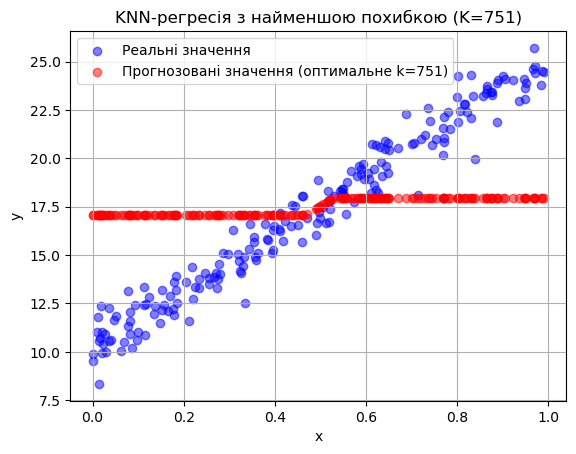

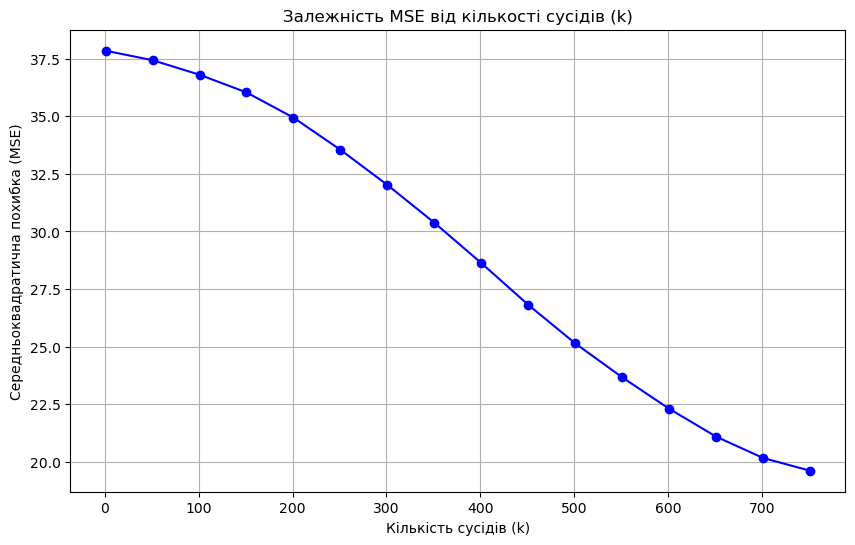

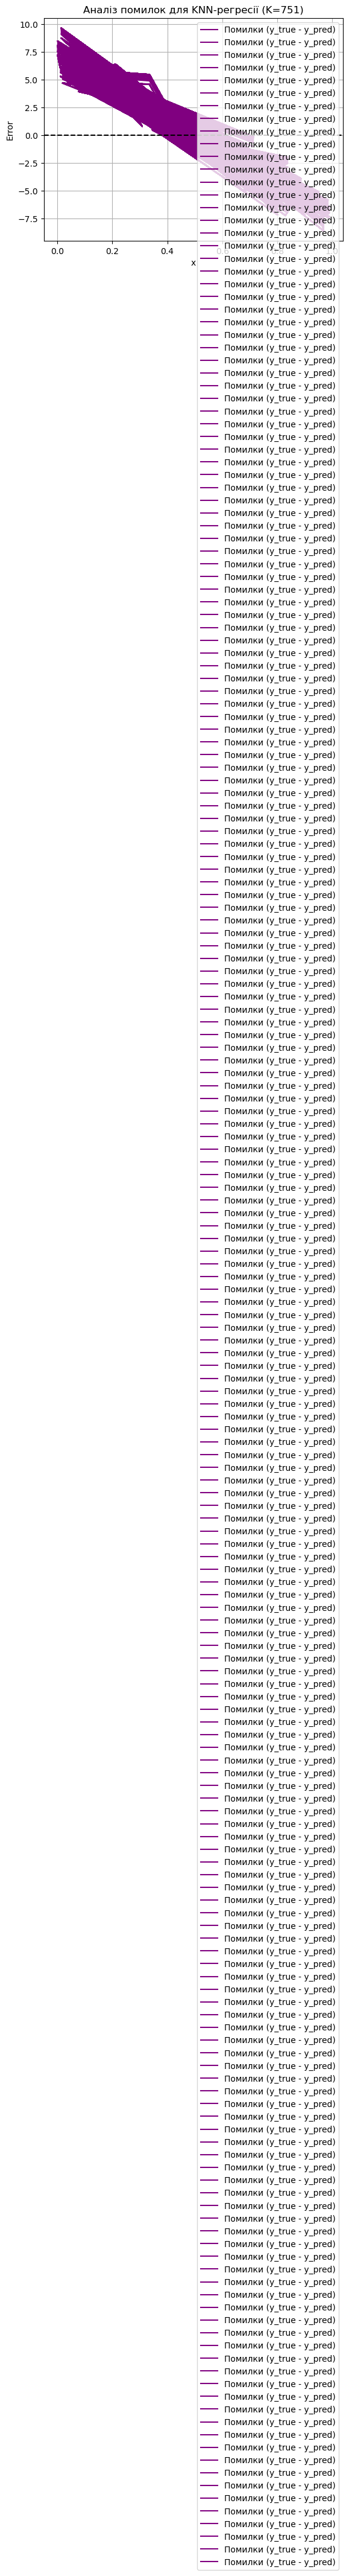

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Функція обчислення евклідової відстані між двома точками
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Функція KNN-регресії
def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        # Вираховуємо відстані від тестової точки до всіх навчальних точок
        distances = [euclidean_distance(test_point, x_train) for x_train in X_train]
        
        # Знаходимо індекси k найближчих сусідів
        k_indices = np.argsort(distances)[:k]
        
        # Отримання міток для k найближчих сусідів
        k_nearest_labels = [y_train[i] for i in k_indices]
        
        # Обчислення середнього значення для прогнозу
        avg_label = np.mean(k_nearest_labels)
        
        # Додавання прогнозу до результатів
        predictions.append(avg_label)
    return np.array(predictions)

# Нормалізація даних та розподіл на вибірки вже зроблено у попередньому коді

# Діапазон значень для параметра k
k_values = range(1, 801, 50)
mse_values = []

# Ітерація по всім значенням k та обчислення MSE для кожного з них
for k in k_values:
    y_pred = knn_predict(x_train, y_train, x_test, k)
    error = mse(y_test, y_pred)
    mse_values.append(error)
    print(f"k = {k}, MSE = {error}")

# Функція обчислення середньоквадратичної похибки (MSE)
def mse(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

# Знаходження оптимального значення k з мінімальною похибкою MSE
optimal_k = k_values[np.argmin(mse_values)]
print(f"Оптимальне значення k: {optimal_k}, Мінімальна похибка MSE: {min(mse_values)}")

# Прогнозування з оптимальним k
y_pred_optimal = knn_predict(x_train, y_train, x_test, optimal_k)

# Візуалізація реальних та прогнозованих значень
plt.scatter(x_test, y_test, color='blue', label='Реальні значення', alpha=0.5)
plt.scatter(x_test, y_pred_optimal, color='red', label=f'Прогнозовані значення (оптимальне k={optimal_k})', alpha=0.5)
plt.title(f'KNN-регресія з найменшою похибкою (K={optimal_k})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Візуалізація зміни MSE для різних значень k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-', color='b')
plt.title("Залежність MSE від кількості сусідів (k)")
plt.xlabel("Кількість сусідів (k)")
plt.ylabel("Середньоквадратична похибка (MSE)")
plt.grid(True)
plt.show()

# Додатковий аналіз та візуалізація помилок
errors = y_pred_optimal - y_test
plt.plot(x_test, errors, color='purple', label='Помилки (y_true - y_pred)')
plt.title(f'Аналіз помилок для KNN-регресії (K={optimal_k})')
plt.xlabel('x')
plt.ylabel('Error')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функція для обчислення евклідової відстані між двома точками
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Функція KNN-регресії
def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        # Обчислення відстаней від тестової точки до всіх навчальних точок
        distances = [euclidean_distance(test_point, x_train) for x_train in X_train]
        # Знаходження індексів k найближчих сусідів
        k_indices = np.argsort(distances)[:k]
        # Отримання міток для k найближчих сусідів
        k_nearest_labels = [y_train[i] for i in k_indices]
        # Обчислення середнього значення для прогнозу
        avg_label = np.mean(k_nearest_labels)
        predictions.append(avg_label)
    return np.array(predictions)

# Функції для обчислення метрик похибки
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Візуалізація відстаней між тестовими і навчальними точками для декількох тестових зразків
def visualize_distances(X_train, X_test, sample_indices):
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(sample_indices):
        test_point = X_test[idx]
        distances = [euclidean_distance(test_point, x_train) for x_train in X_train]
        plt.subplot(1, len(sample_indices), i + 1)
        plt.plot(distances, color='blue', label='Відстань до навчальних точок')
        plt.title(f'Відстані для тестового зразка #{idx}')
        plt.xlabel('Індекс навчальної точки')
        plt.ylabel('Відстань')
        plt.legend()
        plt.grid()
    plt.tight_layout()
    plt.show()

# Візуалізація відстаней для перших трьох тестових точок
sample_indices = [0, 1, 2]
visualize_distances(x_train, x_test, sample_indices)

# Тестування меншого діапазону k від 1 до 50
k_values = range(1, 51, 2)  # Зменшили діапазон k до 1-50
mae_values, mape_values, r2_values = [], [], []

# Ітерація по всім значенням k та обчислення похибок для кожного з них
for k in k_values:
    y_pred = knn_predict(x_train, y_train, x_test, k)
    
    # Обчислюємо похибки для кожної метрики
    mae_error = mae(y_test, y_pred)
    mape_error = mape(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mae_values.append(mae_error)
    mape_values.append(mape_error)
    r2_values.append(r2)
    
    print(f"k = {k}, MAE = {mae_error}, MAPE = {mape_error}, R² = {r2}")

# Знаходження оптимального значення k для кожної метрики
optimal_k_mae = k_values[np.argmin(mae_values)]
optimal_k_mape = k_values[np.argmin(mape_values)]
optimal_k_r2 = k_values[np.argmax(r2_values)]  # R² max indicates better fit

print(f"Оптимальне значення k для MAE: {optimal_k_mae}, Мінімальна MAE: {min(mae_values)}")
print(f"Оптимальне значення k для MAPE: {optimal_k_mape}, Мінімальна MAPE: {min(mape_values)}%")
print(f"Оптимальне значення k для R²: {optimal_k_r2}, Максимальний R²: {max(r2_values)}")

# Прогнозування з оптимальним k для кожної метрики
y_pred_optimal_mae = knn_predict(x_train, y_train, x_test, optimal_k_mae)
y_pred_optimal_mape = knn_predict(x_train, y_train, x_test, optimal_k_mape)
y_pred_optimal_r2 = knn_predict(x_train, y_train, x_test, optimal_k_r2)

# Візуалізація реальних та прогнозованих значень для оптимального k за MAE
plt.figure(figsize=(18, 5))

# MAE
plt.subplot(1, 3, 1)
plt.scatter(x_test, y_test, color='blue', label='Реальні значення', alpha=0.5)
plt.scatter(x_test, y_pred_optimal_mae, color='red', label=f'Прогнозовані (MAE-opt k={optimal_k_mae})', alpha=0.5)
plt.title(f'KNN-регресія з мінімальною MAE (K={optimal_k_mae})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# MAPE
plt.subplot(1, 3, 2)
plt.scatter(x_test, y_test, color='blue', label='Реальні значення', alpha=0.5)
plt.scatter(x_test, y_pred_optimal_mape, color='green', label=f'Прогнозовані (MAPE-opt k={optimal_k_mape})', alpha=0.5)
plt.title(f'KNN-регресія з мінімальною MAPE (K={optimal_k_mape})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# R²
plt.subplot(1, 3, 3)
plt.scatter(x_test, y_test, color='blue', label='Реальні значення', alpha=0.5)
plt.scatter(x_test, y_pred_optimal_r2, color='orange', label=f'Прогнозовані (R²-opt k={optimal_k_r2})', alpha=0.5)
plt.title(f'KNN-регресія з максимальним R² (K={optimal_k_r2})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# Показуємо всі три графіки на одному полотні
plt.tight_layout()
plt.show()
